In [54]:
import pandas as pd
from configurations import config
from sklearn.model_selection import train_test_split
import ast
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

In [55]:
def clean_tags(tag_str: str):
    cleaned_str = tag_str.strip("[]").replace(" ", "").replace("'", "")
    tag_list = cleaned_str.split(',')
    return tag_list

def valid_tags(tags):
    return all(tag in config['tags'] for tag in tags)

In [56]:
df = pd.read_csv('../../data/codeforces_processed_data.csv', index_col=0, encoding='utf8')
df.head()

,time_limit,memory_limit,description,tags,language
Unnamed: 0,,,,,
1846/F,1.0,256.0,interactive task rudolph a scientist study ali...,"['constructive algorithms', 'implementation', ...",en
1847/D,2.0,256.0,josuke tire peaceful life morioh follow nephew...,"['data structures', 'dsu', 'greedy', 'implemen...",en
1846/E2,2.0,256.0,hard version problem difference version $$$ n ...,"['binary search', 'brute force', 'data structu...",en
1846/E1,2.0,256.0,a simple version problem difference version $$...,"['brute force', 'implementation', 'math']",en
1846/C,1.0,256.0,rudolf register a program competition follow r...,"['constructive algorithms', 'greedy', 'impleme...",en


In [57]:
filtered_df = df
filtered_df['tags'] = df['tags'].apply(clean_tags)

filtered_df = df[df['tags'].apply(valid_tags) & (df['language'] == 'en')]

filtered_df.head()
filtered_df.shape

(3249, 5)

In [58]:
# Take just half of dataframe
filtered_df, _ = train_test_split(filtered_df, test_size=0.5, random_state=42)

filtered_df.to_csv('./data/CTP10/en_CTP10.csv')

In [50]:
def show_tags(df):
    tags = df['tags']
    all_tags = [tag for sublist in tags for tag in sublist]
    tag_counts = Counter(all_tags)
    print(tag_counts)

    top_tags = pd.DataFrame(tag_counts.most_common(10), columns=['tag', 'count'])
    sns.barplot(x='count', y='tag', data=top_tags)
    plt.title('Labels')
    plt.xlabel('Frequency')
    plt.ylabel('Tags')
    plt.show()

In [42]:
# Split into training and test sets
train_df, test_df = train_test_split(filtered_df, test_size=0.2, random_state=42)


# Split the training set into training and validation sets
train_df, validation_df = train_test_split(train_df, test_size=0.25, random_state=42)  # 0.25 * 0.8 = 0.2

# Print the number of rows in each set
print(f"Training set: {train_df.shape[0]} rows")
print(f"Validation set: {validation_df.shape[0]} rows")
print(f"Test set: {test_df.shape[0]} rows")

Training set: 974 rows
Validation set: 325 rows
Test set: 325 rows


Counter({'implementation': 716, 'greedy': 537, 'math': 494, 'bruteforce': 330, 'constructivealgorithms': 326, 'dp': 259, 'datastructures': 225, 'strings': 180, 'geometry': 91, 'dfsandsimilar': 35})


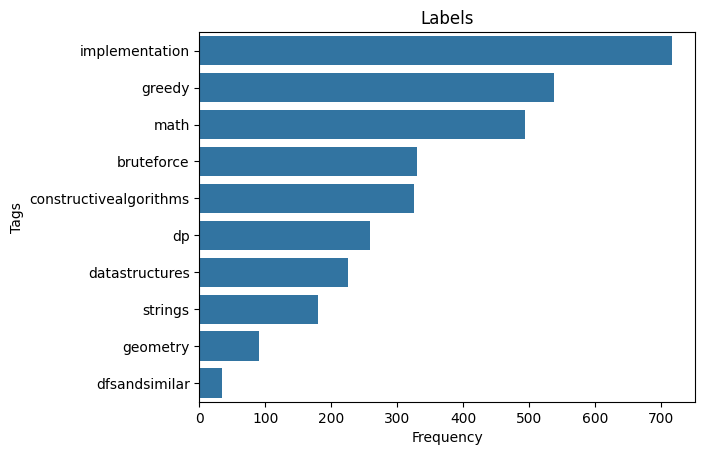

In [51]:
show_tags(filtered_df)

In [ ]:
show_tags(train_df)
show_tags(validation_df)
show_tags(test_df)

In [52]:
train_df.to_csv('./data/CTP10/train.csv')
validation_df.to_csv('./data/CTP10/validation.csv')
test_df.to_csv('./data/CTP10/test.csv')